In [22]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [4]:
csvfilename = "calculated_features/awe-awet_lpq.csv"
data = pd.read_csv(csvfilename)
X = data.drop('class', axis=1)  
y = data['class']

In [5]:
X.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v9207,v9208,v9209,v9210,v9211,v9212,v9213,v9214,v9215,v9216
0,87,44,45,46,46,68,0,0,0,1,...,1,1,1,0,0,2,0,0,1,0
1,88,49,44,44,44,68,1,0,0,0,...,0,1,0,0,2,0,0,0,0,0
2,84,44,44,46,46,72,2,4,1,2,...,0,0,0,1,1,1,2,1,1,1
3,85,46,45,44,44,68,1,0,0,0,...,0,0,3,1,0,0,0,0,0,2
4,85,44,44,47,45,68,0,0,0,2,...,0,0,1,0,0,0,0,2,1,0


In [6]:
X.shape

(1000, 9216)

In [16]:
X_ = X.values
X_[0:5,0:5]

array([[87, 44, 45, 46, 46],
       [88, 49, 44, 44, 44],
       [84, 44, 44, 46, 46],
       [85, 46, 45, 44, 44],
       [85, 44, 44, 47, 45]])

In [17]:
scaler = MinMaxScaler(feature_range=[0, 1])
X_rescaled = scaler.fit_transform(X_[:,0:1000])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [18]:
type(X_rescaled), len(X_rescaled)

(numpy.ndarray, 1000)

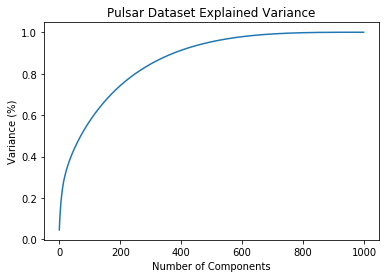

In [23]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()